In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
df = pd.read_csv("../data/raw/clinical_notes.csv")
df.head()

,patient_id,note_text
0,0,Patient is a 32-year-old Male with a history o...
1,1,Patient is a 65-year-old Female with a history...
2,2,Patient is a 20-year-old Female with a history...
3,3,Patient is a 39-year-old Female with a history...
4,4,Patient is a 69-year-old Male with a history o...


In [6]:
print("Number of notes", df.shape)
print("Missing value: ", df.isnull().sum())

Number of notes (201, 2)
Missing value:  patient_id    0
note_text     0
dtype: int64


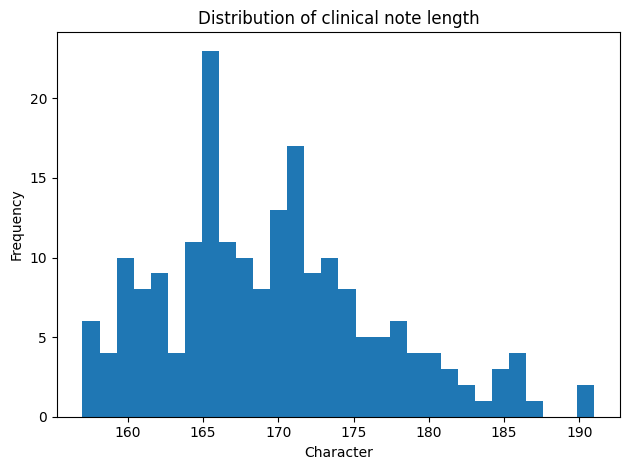

In [7]:
df['note_length'] = df['note_text'].apply(len)

plt.hist(df['note_length'], bins=30)
plt.title("Distribution of clinical note length")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

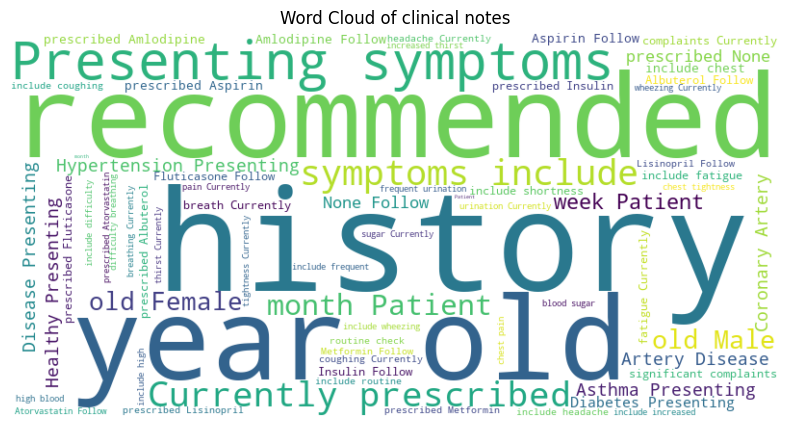

In [8]:
#word cloud (all notes combined)
text = " ".join(df['note_text'].tolist())
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of clinical notes")
plt.show()

In [9]:
for keyword in ["Diabetes", "Hypertension", "Asthma", "Coronary Artery Disease", "Healthy"]:
    count = df['note_text'].str.contains(keyword).sum()
    print(f"{keyword}:{count} notes mentioning it")

Diabetes:37 notes mentioning it
Hypertension:43 notes mentioning it
Asthma:42 notes mentioning it
Coronary Artery Disease:40 notes mentioning it
Healthy:39 notes mentioning it


In [10]:
import re

# Extract diagnosis
df['diagnosis'] = df['note_text'].str.extract(r"history of ([^.]+)\.")

# Quick check
print(df[['note_text', 'diagnosis']].head())

                                           note_text     diagnosis
0  Patient is a 32-year-old Male with a history o...       Healthy
1  Patient is a 65-year-old Female with a history...  Hypertension
2  Patient is a 20-year-old Female with a history...      Diabetes
3  Patient is a 39-year-old Female with a history...        Asthma
4  Patient is a 69-year-old Male with a history o...  Hypertension


In [11]:
#Symtom frequency analysis
import seaborn as sns

symptom_counts = df['symptom'].value_counts().reset_index()
symptom_counts.columns = ['Symptom', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Symptom', data=symptom_counts.head(10), palette="viridis")
plt.title("Top 10 Most Common Symptoms", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.show()

KeyError: 'symptom'

In [ ]:
print(df.columns)

Index(['patient_id', 'note_text', 'note_length'], dtype='object')
